<a href="https://colab.research.google.com/github/KevinKuslin/MachineLearning2025/blob/main/Kel5_ML_SpotifySongRecommendation_PPTI21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

# Import dari Lokal ke Colab

In [24]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Lq-G1hoqungr9k-haFbLHEF1ixrjhSb7')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


# Exploratory Data and Analysis: Jumlah Data dan Data Type Dataset

In [25]:
print(df.shape)
df.info()

(232725, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_si

# Exploratory Data Analysis: Data Description (Univariate Nongraphical)

In [26]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Exploratory Data Analysis: Unique Value Count

In [27]:
df.nunique()

,0
genre,27
artist_name,14564
track_name,148607
track_id,176774
popularity,101
acousticness,4734
danceability,1295
duration_ms,70749
energy,2517
instrumentalness,5400


# Exploratory Data Analysis: Data NULL Counts

In [28]:
df.isnull().sum()

,0
genre,0
artist_name,0
track_name,1
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


# Exploratory Data Analysis: Duplicated Data Count

In [29]:
print(df.duplicated().sum())

0


# Exploratory Data Analysis: Telusuri Data Target dan Setiap Fitur

In [30]:
columns = list(df.columns)

for column in columns:
  print(f'\n{column}: ', df[column].unique())


genre:  ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']

artist_name:  ['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos']

track_name:  ["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]

track_id:  ['0BRjO6ga9RKCKjfDqeFgWV' '0BjC1NfoEOOusryehmNudP'
 '0CoSDzoNIKCRs124s9uTVy' ... '2iZf3EUedz9MPqbAvXdpdA'
 '1qWZdkBl4UVPj9lK6HuuFM' '34XO9RwPMKjbvRry54QzWn']

popularity:  [  0   1   3   4   2  15  10   8   5   6   7  11  65  63  62  61  68  64
  66  60  69  71  76  67  70  72  57  59  56  28  31  74  55  53   9  13
  23  12  44  33  25  26  24  22  20  19  18  16  17  14  83  81  73  78
  77  75  45  42  46  

# Exploratory Data Analysis: Histogram (Univariate Graphical Visualization)

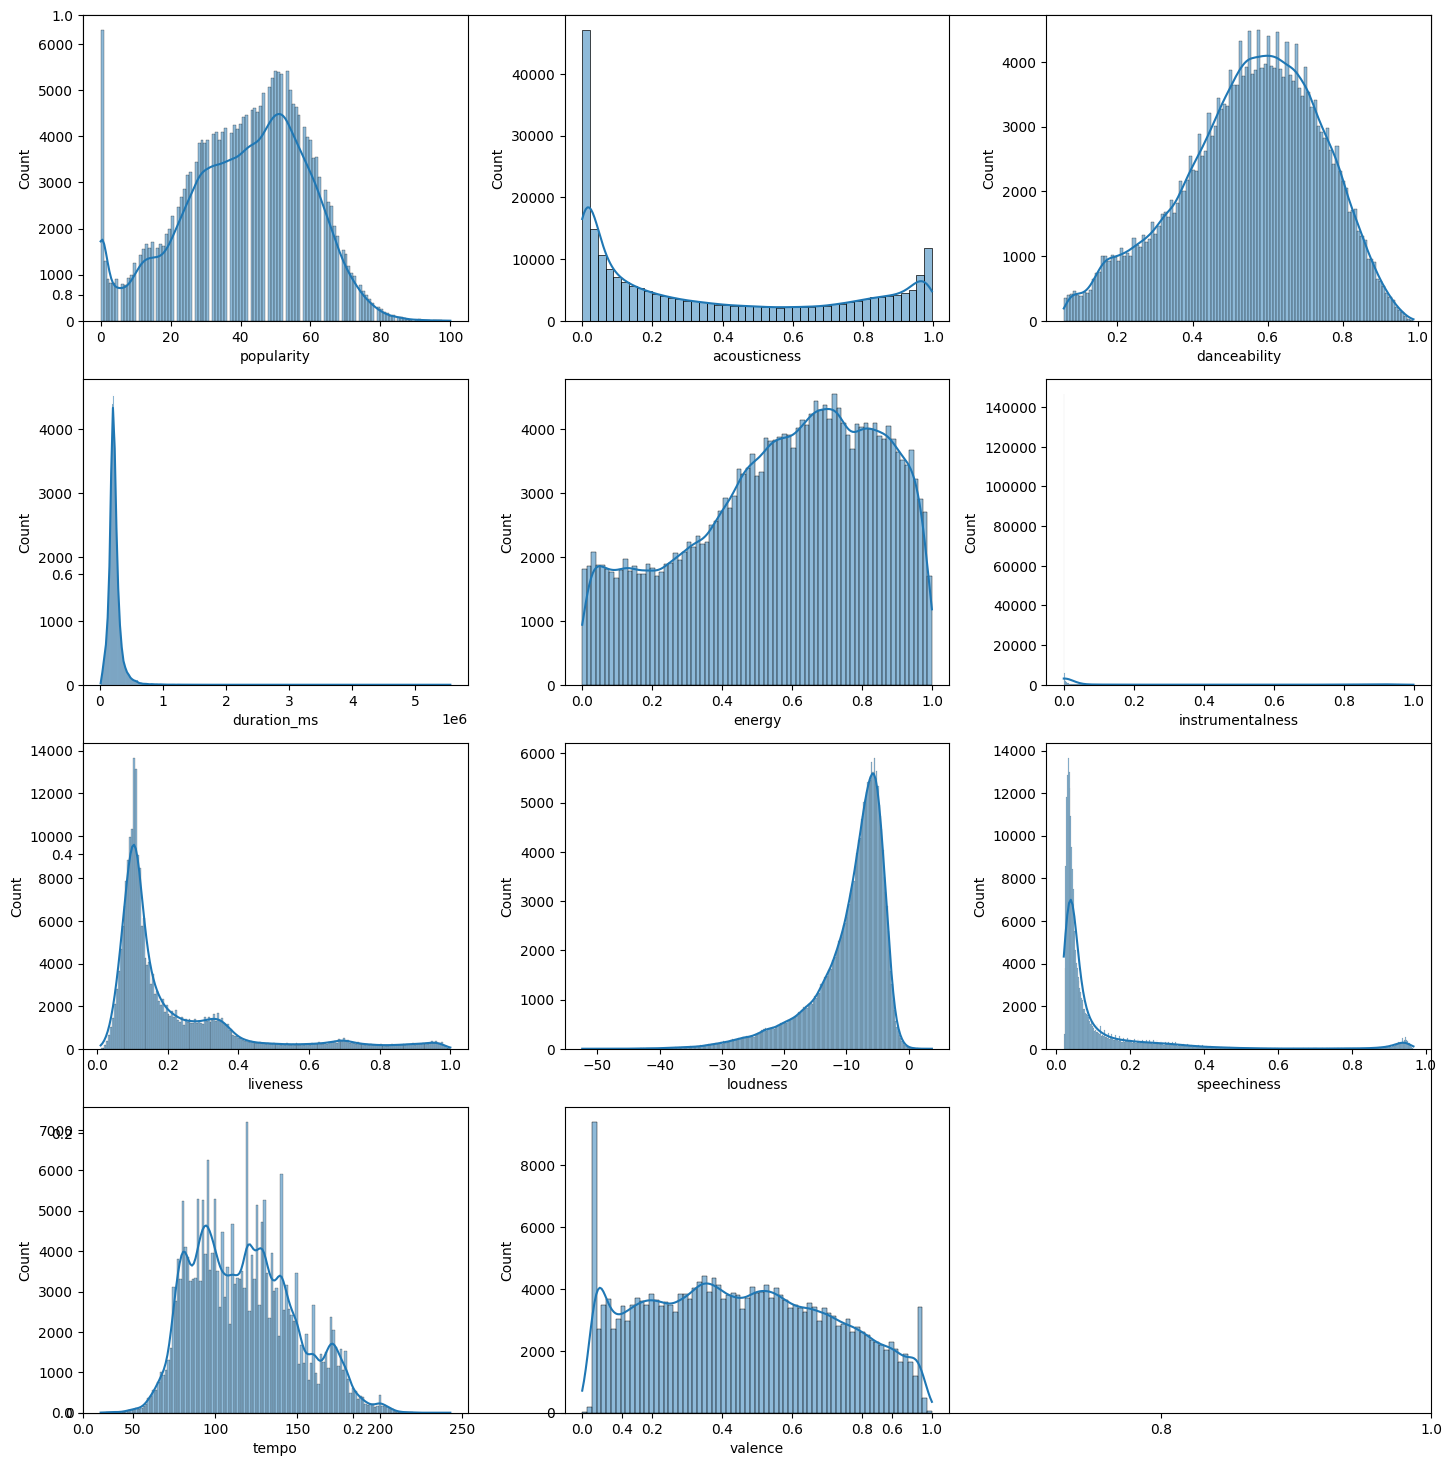

In [31]:
features = df.select_dtypes(include=['int64', 'float64'])
plt.subplots(figsize=(15, 15))

for i, feature in enumerate(features):
  plt.subplot(4, 3, i+1)
  sb.histplot(df[feature], kde=True)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Correlation Analysis with Heat Map (Multivariate Nongraphical)

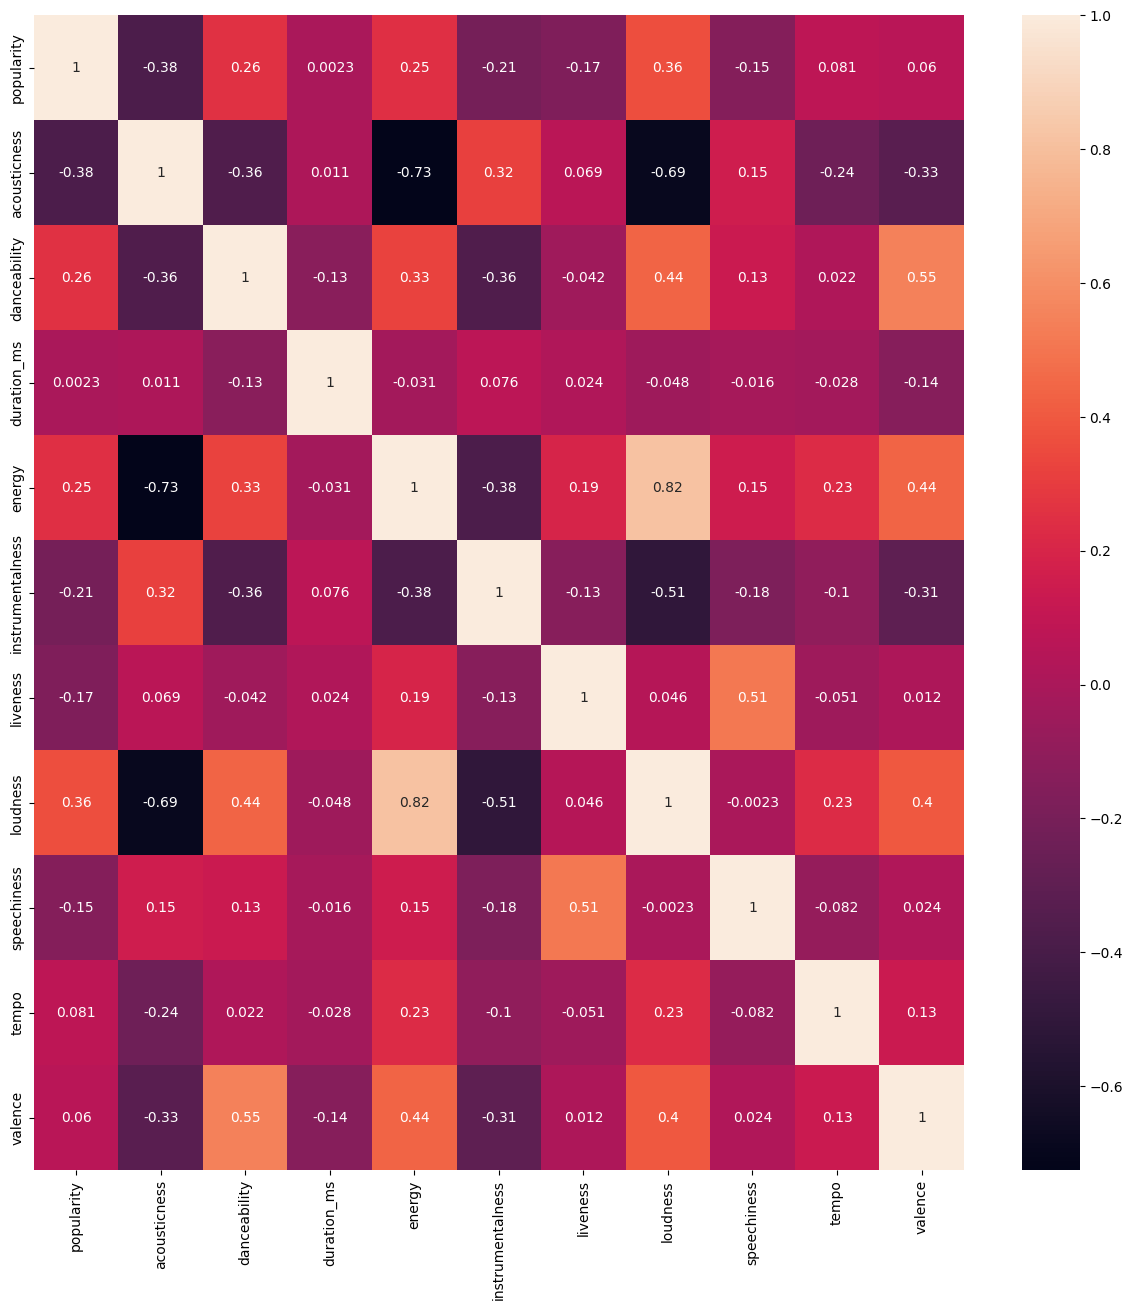

In [32]:
plt.figure(figsize=(15, 15))
df_test = df.select_dtypes(include=['int64', 'float64'])
sb.heatmap(df_test.corr(), annot=True)
plt.show()